In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
df_fish=pd.read_csv('Fish.csv')
df_fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df_fish.shape

(159, 7)

In [6]:
df_fish.info()
#There are no null values and datatypes are also right for each attribute

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
df_fish['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

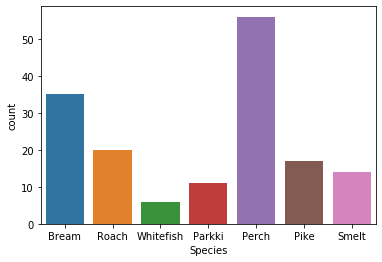

In [8]:
sns.countplot(x=df_fish['Species'],data=df_fish)
plt.show()

In [9]:
#Converting string into integer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
col = ['Species']
df_fish[col] = le.fit_transform(df_fish[col])

C:\Users\j\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
df_fish.describe()
#Statistical Analysis

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,2.264151,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,1.704249,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,1.000000,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,2.000000,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,3.500000,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,6.000000,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [11]:
df_fish_corr=df_fish.corr()
df_fish_corr
#Correlation between attributes

,Species,Weight,Length1,Length2,Length3,Height,Width
Species,1.000000,-0.312960,-0.266696,-0.283601,-0.335519,-0.698193,-0.397578
Weight,-0.312960,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,-0.266696,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,-0.283601,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,-0.335519,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,-0.698193,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,-0.397578,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


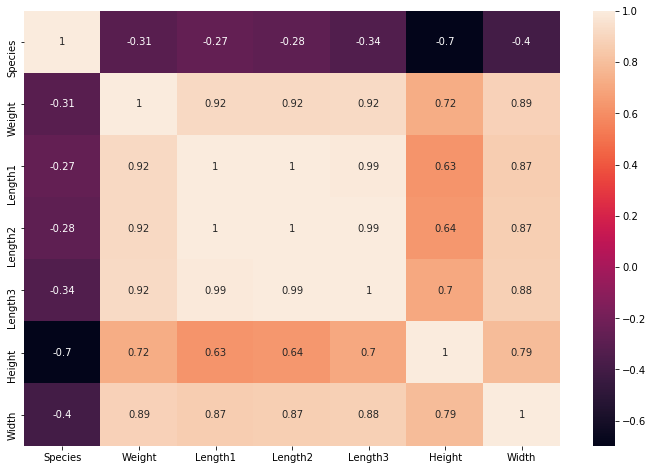

In [12]:
#Correlation between attributes
plt.figure(figsize=(12, 8))
sns.heatmap(df_fish_corr, annot=True)
plt.show()
#Weight has strong positive relationship with all length attributes , height and width

In [13]:
df_fish.columns.values

array(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'], dtype=object)

In [14]:
#Rearranging columns
df_fish=df_fish[[ 'Weight','Species', 'Length1', 'Length2', 'Length3', 'Height','Width']]
df_fish.head()

,Weight,Species,Length1,Length2,Length3,Height,Width
0,242.0,0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,0,26.5,29.0,34.0,12.4440,5.1340


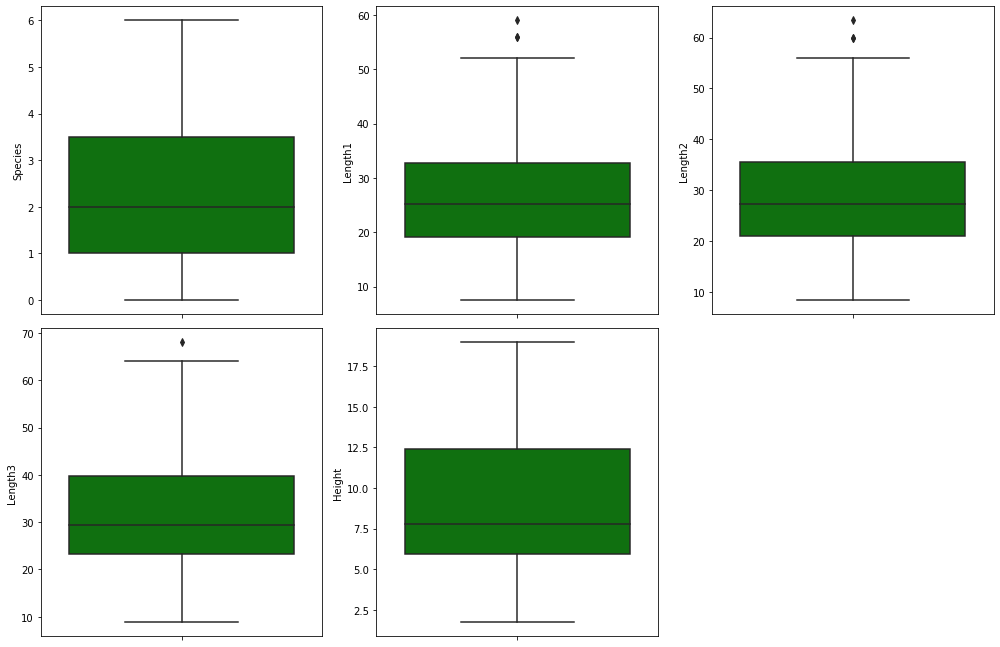

In [15]:
col_list=df_fish.iloc[:,1:6].columns.values
plt.figure(figsize=(14,18))
for i in range(0, len(col_list)):                                      
    plt.subplot(4,3,i+1)
    sns.boxplot(df_fish[col_list[i]], color="green", orient='v')
    plt.tight_layout()
#Boxplot to check outliers

In [16]:
df_fish1=df_fish.iloc[:,0:8]
from scipy.stats import zscore
z_score=abs(zscore(df_fish1))
print(df_fish.shape)
df_fish1_final=df_fish.loc[(z_score<3).all(axis=1)]                  
print(df_fish1_final.shape)
#to quantify the outliers

(159, 7)
(156, 7)


In [17]:
df_fish=df_fish[(z_score<3).all(axis=1)]
#To remove the outliers

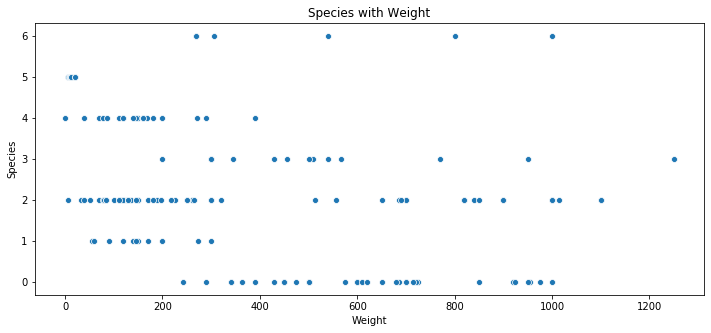

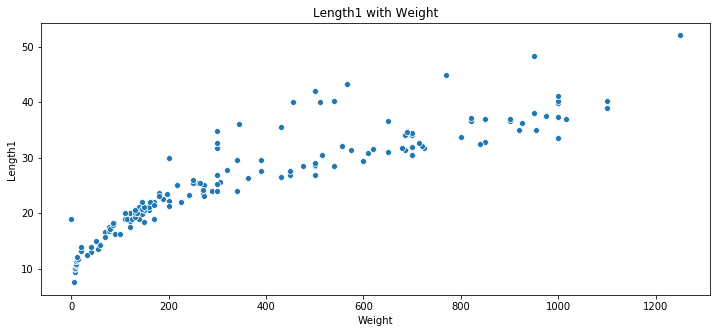

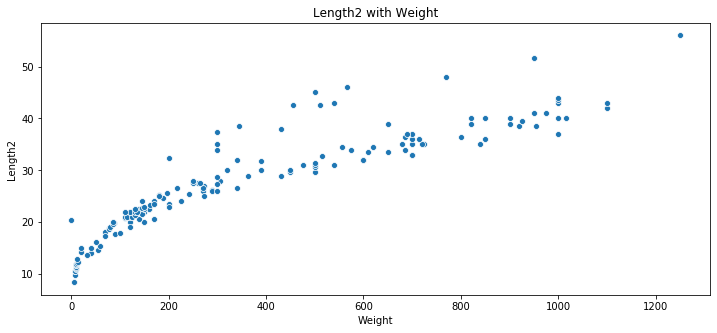

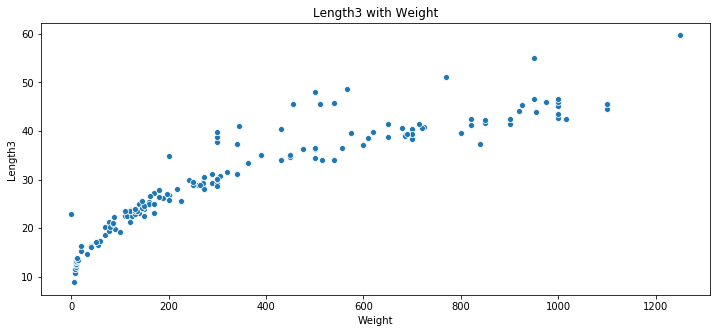

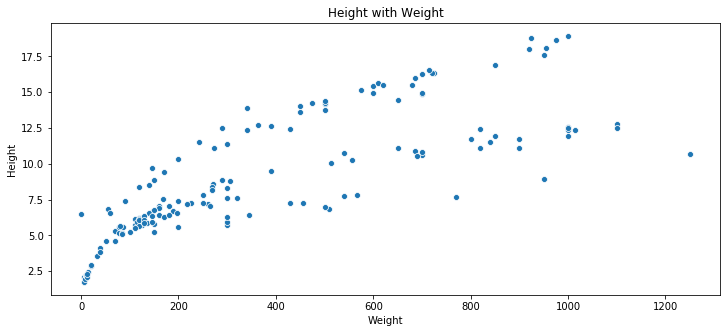

In [18]:
#Scatter Plot to show the relationships between target and feature attributes
cols = df_fish.iloc[:,1:6]
for col in cols:
    plt.figure(figsize=(12, 5))
    plt.title(str(col) +' with' + ' Weight')
    sns.scatterplot(x=df_fish['Weight'], y=df_fish[col], data=df_fish)
    plt.show()

In [19]:
#Splitting of data
x = df_fish.iloc[:,1:6]
y = df_fish['Weight']

In [20]:
sc = StandardScaler()
x = sc.fit_transform(x)
#scaling down using standardscalar

In [29]:
#Testing the models at random state 42 along with their r2 score
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.20)
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),RandomForestRegressor()]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(r2_score(y_test,predm))
#After the testing several models, we have found that KNeighborsRegressor is giving highest r2 score at random state 42.

0.921145190410043
0.9505405046647972
-0.01628550209048152
0.9642521456274494


In [30]:
#Now we will check at what randome state, RandomForestRegressor model will give highest r2 score.
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.20)
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    y_pred=rfr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2 score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('max r2 score corresponding to ',final_r_state," is ",max_r_score)
#Max. r2 score with RandomForestRegressor model is 0.9800012974466071, which is at random state 91

r2 score corresponding to random state:  42  is:  0.9657151662113274
r2 score corresponding to random state:  43  is:  0.9610277114747203
r2 score corresponding to random state:  44  is:  0.971365811665034
r2 score corresponding to random state:  45  is:  0.9645097199997259
r2 score corresponding to random state:  46  is:  0.9569253408074514
r2 score corresponding to random state:  47  is:  0.9308766921419603
r2 score corresponding to random state:  48  is:  0.938782027816027
r2 score corresponding to random state:  49  is:  0.9333276447551366
r2 score corresponding to random state:  50  is:  0.9713404545385369
r2 score corresponding to random state:  51  is:  0.9303231906034796
r2 score corresponding to random state:  52  is:  0.9219962898614702
r2 score corresponding to random state:  53  is:  0.9024997479200805
r2 score corresponding to random state:  54  is:  0.9591211571685487
r2 score corresponding to random state:  55  is:  0.9441948719408741
r2 score corresponding to random sta

In [31]:
#Cross Validation of RandomForestRegressor
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestRegressor(),x,y,cv=5,scoring='r2').mean()

0.8380557250783731

In [25]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid1 = {"n_estimators" : [9, 18, 27, 36, 45, 54, 63, 72, 81, 90],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}

rfr = RandomForestRegressor(random_state=91)

rfr_cv1 = GridSearchCV(rfr, param_grid1, cv=5,scoring='r2',n_jobs=4)

# Fit it to the data
rfr_cv1.fit(x_train,y_train)

#rfr_cv1.cv_results_, 
rfr_cv1.best_params_, rfr_cv1.best_score_

({'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 36},
 0.9328068124123311)

In [34]:
param_grid1 = {"n_estimators" : [9, 18, 27, 36, 45, 54, 63, 72, 81, 90],
           "max_depth" : [1, 5, 10, 15, 20, 25, 30],
           "min_samples_leaf" : [1, 2, 4, 6, 8, 10]}

rfr = RandomForestRegressor(random_state=None)

rfr_cv1 = GridSearchCV(rfr, param_grid1, cv=5,scoring='r2',n_jobs=4)

# Fit it to the data
rfr_cv1.fit(x_train,y_train)

#rfr_cv1.cv_results_, 
rfr_cv1.best_params_, rfr_cv1.best_score_

({'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 54},
 0.9368782794219476)

In [35]:
#Implementing RandomForestRegressor model at random state 91
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=91,test_size=0.20)
rfr=RandomForestRegressor()            
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
y_pred=rfr.predict(x_test)
print(r2_score(y_test,y_pred))

0.9806071842920436


In [36]:
#Saving the model
import joblib
filename = 'Project14_model.sav'
joblib.dump(rfr, filename)

['Project14_model.sav']